In [1]:
import pandas as p
import seaborn as sb

In [2]:
df=p.read_csv('metadata.csv')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Remove redundent rows

In [3]:
df=df.drop(['sha'],axis=1)
df=df.drop(['pmcid'],axis=1)
df=df.drop(['pubmed_id'],axis=1)
df=df.drop(['Microsoft Academic Paper ID'],axis=1)
df=df.drop(['WHO #Covidence'],axis=1)
df=df.drop(['has_pdf_parse'],axis=1)
df=df.drop(['full_text_file'],axis=1)
df=df.drop(['cord_uid'],axis=1)
df=df.drop(['has_pmc_xml_parse'],axis=1)
df=df.drop(['url'],axis=1)
df=df.drop(['doi'],axis=1)

# Remove NaN values

In [4]:
df=df[df['title'].notna()]

# separate training data for punktsentencetokenizer

In [5]:
df=df[df['title'].notna()]
train_data=""
df=df[df['publish_time'].notna()]
for i, row in df.iterrows():
    if (int(df.loc[i,'publish_time'][:4])<2020):
        train_data+=df.loc[i,'title']
        df.drop([i], axis = 0, inplace = True)
    #else:
        #train_data+=" "
        #train_data+=df.loc[i,'title']
print(df.shape)

(4324, 7)


# create dataframe for final result

In [6]:
import pandas as p
final=p.DataFrame(columns=['Pneumonia','Fever','Cough','Respiratory problem','Diabetes','Covid-19'])
print(final)

Empty DataFrame
Columns: [Pneumonia, Fever, Cough, Respiratory problem, Diabetes, Covid-19]
Index: []


# inserting data into the final clean dataframe

In [7]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer
import pandas as p
from nltk.stem import WordNetLemmatizer

custom_sent_tokenizer = PunktSentenceTokenizer(train_data)
lemmatizer=WordNetLemmatizer()
all_nouns=[]
for k, row in df.iterrows():
    flp=0;flf=0;flc=0;flr=0;flC=0;fld=0
    if(isinstance((df.loc[k,'abstract']),str)):
        tokenized = custom_sent_tokenizer.tokenize(df.loc[k,'abstract'])
        for j in tokenized:
            words = nltk.word_tokenize(j)
            lwords=[]
            for word in words:
                lword=lemmatizer.lemmatize(word)
                lwords.append(lword)
            pos=nltk.pos_tag(lwords)
            for i in pos:
                if (i[1]=="NN" or i[1]=="NNP" or i[1]=="NNS" or i[1]=="NNPS"):
                    all_nouns.append(i[0].lower())
                    if(i[0].lower()=='pneumonia'):
                        final.loc[k,'Pneumonia']=True
                        flp=1
                        continue
                    else:
                        if(flp==0):
                            final.loc[k,'Pneumonia']=False
                    if(i[0].lower()=='diabetes'):
                        final.loc[k,'Diabetes']=True
                        fld=1
                        continue
                    else:
                        if(fld==0):
                            final.loc[k,'Diabetes']=False
                    if(i[0].lower()=='fever'):
                        final.loc[k,'Fever']=True
                        flf=1
                        continue
                    else:
                        if(flf==0):
                            final.loc[k,'Fever']=False
                    if(i[0].lower()=='cough'):
                        final.loc[k,'Cough']=True
                        flc=1
                        continue
                    else:
                        if(flc==0):
                            final.loc[k,'Cough']=False
                    if(i[0].lower()=='respiratory'):
                        final.loc[k,'Respiratory problem']=True
                        flr=1
                        continue
                    else:
                        if(flr==0):
                            final.loc[k,'Respiratory problem']=False
                    if(i[0].lower()=='covid-19' or i[0].lower()=='coronavirus' or i[0].lower()=='sars-cov-2'):
                        final.loc[k,'Covid-19']=True
                        flC=1
                        continue
                    else:
                        if(flC==0):
                            final.loc[k,'Covid-19']=False                    
    else:
        tokenized = custom_sent_tokenizer.tokenize(df.loc[k,'title'])
        for j in tokenized:
            words = nltk.word_tokenize(j)
            lwords=[]
            for word in words:
                lword=lemmatizer.lemmatize(word)
                lwords.append(lword)
            pos=nltk.pos_tag(lwords)
            for i in pos:
                if (i[1]=="NN" or i[1]=="NNP" or i[1]=="NNS" or i[1]=="NNPS"):
                    all_nouns.append(i[0].lower())
                    if(i[0].lower()=='pneumonia'):
                        final.loc[k,'Pneumonia']=True
                        flp=1
                        continue
                    else:
                        if(flp==0):
                            final.loc[k,'Pneumonia']=False
                    if(i[0].lower()=='diabetes'):
                        final.loc[k,'Diabetes']=True
                        fld=1
                        continue
                    else:
                        if(fld==0):
                            final.loc[k,'Diabetes']=False
                    if(i[0].lower()=='fever'):
                        final.loc[k,'Fever']=True
                        flf=1
                        continue
                    else:
                        if(flf==0):
                            final.loc[k,'Fever']=False
                    if(i[0].lower()=='cough'):
                        final.loc[k,'Cough']=True
                        flc=1
                        continue
                    else:
                        if(flc==0):
                            final.loc[k,'Cough']=False
                    if(i[0].lower()=='respiratory'):
                        final.loc[k,'Respiratory problem']=True
                        flr=1
                        continue
                    else:
                        if(flr==0):
                            final.loc[k,'Respiratory problem']=False
                    if(i[0].lower()=='covid-19' or i[0].lower()=='coronavirus' or i[0].lower()=='sars-cov-2'):
                        final.loc[k,'Covid-19']=True
                        flC=1
                        continue
                    else:
                        if(flC==0):
                            final.loc[k,'Covid-19']=False
                        
print(len(all_nouns))                
all_n=p.Series(all_nouns)
most_occured_nouns=all_n.value_counts()

242372


In [8]:
print(most_occured_nouns.head(500))
if "respiratory" in all_nouns: print("yup")

%                5199
covid-19         4706
patient          4523
case             3900
disease          2924
coronavirus      2909
infection        2844
virus            2360
wa               2336
china            2259
sars-cov-2       1739
health           1735
study            1714
outbreak         1709
data             1457
wuhan            1456
number           1326
model            1213
respiratory      1174
transmission     1168
treatment        1162
ha               1154
cell             1134
pneumonia        1096
day              1051
control           997
risk              996
time              989
rate              941
group             931
                 ... 
room               87
questionnaire      87
liver              86
amino              86
estimation         86
prognosis          85
technique          85
imaging            85
+                  84
society            84
profile            84
observation        83
e                  83
involvement        82
covs      

# Chekck the final dataframe

True     3036
False    1283
Name: Covid-19, dtype: int64


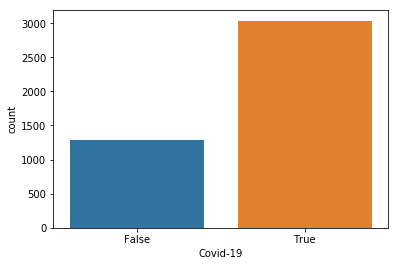

In [9]:
import seaborn as sb
print(final['Covid-19'].value_counts())
sb.countplot(final['Covid-19'])

False    4070
True      249
Name: Fever, dtype: int64


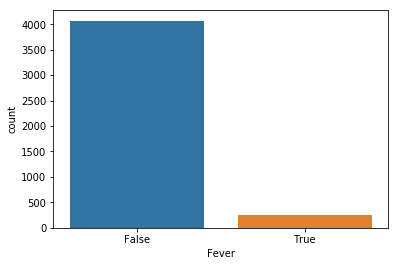

In [10]:
print(final['Fever'].value_counts())
sb.countplot(final['Fever'])

False    4147
True      172
Name: Cough, dtype: int64


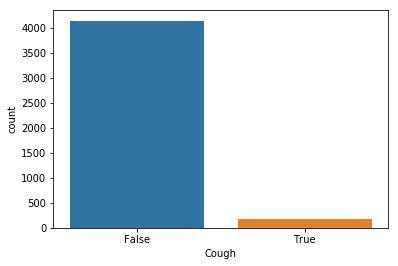

In [11]:
print(final['Cough'].value_counts())
sb.countplot(final['Cough'])

False    3576
True      743
Name: Respiratory problem, dtype: int64


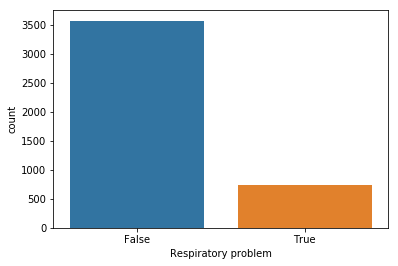

In [12]:
print(final['Respiratory problem'].value_counts())
sb.countplot(final['Respiratory problem'])

False    3650
True      669
Name: Pneumonia, dtype: int64


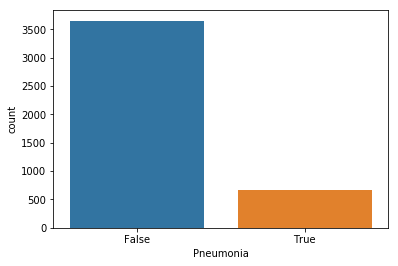

In [13]:
print(final['Pneumonia'].value_counts())
sb.countplot(final['Pneumonia'])

False    4279
True       40
Name: Diabetes, dtype: int64


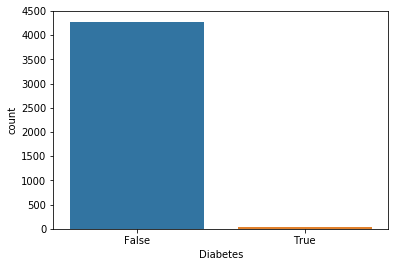

In [14]:
print(final['Diabetes'].value_counts())
sb.countplot(final['Diabetes'])

In [15]:
print(final.head(10))

      Pneumonia  Fever  Cough  Respiratory problem  Diabetes  Covid-19
1784      False  False  False                False     False     False
1785      False  False  False                False     False     False
1786      False  False  False                False     False     False
1787      False  False  False                False     False     False
1792      False  False  False                False     False     False
1793      False  False  False                False     False     False
2557       True  False  False                False     False     False
2560      False  False  False                False     False     False
2729      False  False  False                False     False     False
2730      False  False  False                False     False     False


In [16]:
final.to_csv('Covid dataset.csv',index=False)